In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# file pathes:
train_path = './MLProject2024/fashion_train.npy'
test_path = './MLProject2024/fashion_test.npy'

# load data
train_data = np.load(train_path)
test_data = np.load(test_path)

#should I scale the data?

In [3]:
#defining the X an y training and testing data
X_train, y_train = train_data[:, : -1], train_data[:, -1]
X_test, y_test = test_data[:, : -1], test_data[:, -1]

In [4]:
#define mapping classes via encoding
mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

In [5]:
# fitting 5, 10, 15 and 25 neighbours: 
k_values = [5, 10, 15, 25]
knn_fit = []

for k in k_values:
    knn_fit.append(KNeighborsClassifier(k).fit(X_train,y_train))

# knn5 = KNeighborsClassifier(5).fit(X_train, y_train)
# knn_fit.append(knn5)

# knn10 = KNeighborsClassifier(10).fit(X_train, y_train)
# knn_fit.append(knn10)

# knn15 = KNeighborsClassifier(15).fit(X_train, y_train)
# knn_fit.append(knn15)

# knn25 = KNeighborsClassifier(25).fit(X_train, y_train)
# knn_fit.append(knn25)

In [6]:
# make predictions and measure accuracy for each model:
y_pred = []
for knn_classifier in knn_fit:
    y_pred.append(knn_classifier.predict(X_test))


# y_pred5 = knn5.predict(X_test)
# y_pred.append(y_pred5)

# y_pred10 = knn10.predict(X_test)
# y_pred.append(y_pred10)

# y_pred15 = knn15.predict(X_test)
# y_pred.append(y_pred15)

# y_pred25 = knn25.predict(X_test)
# y_pred.append(y_pred25)

# calcualte accuracy
accuracy_values = []
for pred in y_pred: 
    accuracy_values.append(accuracy_score(y_test,pred))

# accuracy5 = accuracy_score(y_test, y_pred5)
# accuracy10 = accuracy_score(y_test, y_pred10)
# accuracy15 = accuracy_score(y_test, y_pred15)
# accuracy25 = accuracy_score(y_test, y_pred25)

# for k in range(len(k_values)):
#     print(f"Accuracy with {k_values[k]} neighbors: {accuracy_values[k]}")


# print(f"Accuracy with 10 neighbors: {accuracy10}")
# print(f"Accuracy with 15 neighbors: {accuracy15}")
# print(f"Accuracy with 25 neighbors: {accuracy25}")

# plot the accuracy values for each k

# accuracies = [accuracy5, accuracy10, accuracy15, accuracy25]

# # Plotting the results
# plt.figure(figsize=(8, 6))
# plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
# plt.title('Accuracy vs Number of Neighbors (K)')
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Accuracy')
# plt.grid(True)
# plt.show()


In [7]:
#add recall for further evaluation
recall_values = []
for pred in y_pred:
    recall_values.append(recall_score(y_test, pred, average='macro'))


# recall5 = recall_score(y_test, y_pred5, average='macro') #macro gives equal weight to each class

# recall_values.append(recall5) 
# recall10 = recall_score(y_test, y_pred10, average='macro')
# recall_values.append(recall10)

# recall15 = recall_score(y_test, y_pred15, average='macro') 
# recall_values.append(recall15)

# recall25 = recall_score(y_test, y_pred25, average='macro')
# recall_values.append(recall25) 


# for k in range(len(k_values)):
#     print(f"Recall with {k_values[k]} neighbors: {recall_values[k]}")

# # Plotting the results
# plt.figure(figsize=(8, 6))
# plt.plot(k_values, recall_values, marker='o', linestyle='--', color='g')
# plt.title('Recall vs Number of Neighbors (K)')
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Recall score')
# plt.grid(True)
# plt.show()

In [8]:
#add precision
precision_values = []
for i in range(len(y_pred)):
    precision_values.append(precision_score(y_test, y_pred[i], average='macro'))

In [9]:
# F1 score
f1_scores = []
for i in range(len(y_pred)):
    f1_scores.append(f1_score(y_test, y_pred[i], average='macro'))
    

In [10]:
#creating a table with all the scores calcualted before

print("{:<10} | {:^10} | {:^10} | {:^10} | {:^10}".format("Neighbors", "Accuracy", "Recall", "Precision", "F1"))
print("-" * 60)
for i in range(len(k_values)):
    print("{:<10} | {:^10.5f} | {:^10.5f} | {:^10.5f} | {:^10.5f}".format(
        k_values[i], accuracy_values[i], recall_values[i], precision_values[i], f1_scores[i]
    ))

Neighbors  |  Accuracy  |   Recall   | Precision  |     F1    
------------------------------------------------------------
5          |  0.82200   |  0.82200   |  0.82266   |  0.82085  
10         |  0.82500   |  0.82500   |  0.82525   |  0.82258  
15         |  0.81420   |  0.81420   |  0.81533   |  0.81355  
25         |  0.81360   |  0.81360   |  0.81459   |  0.81281  


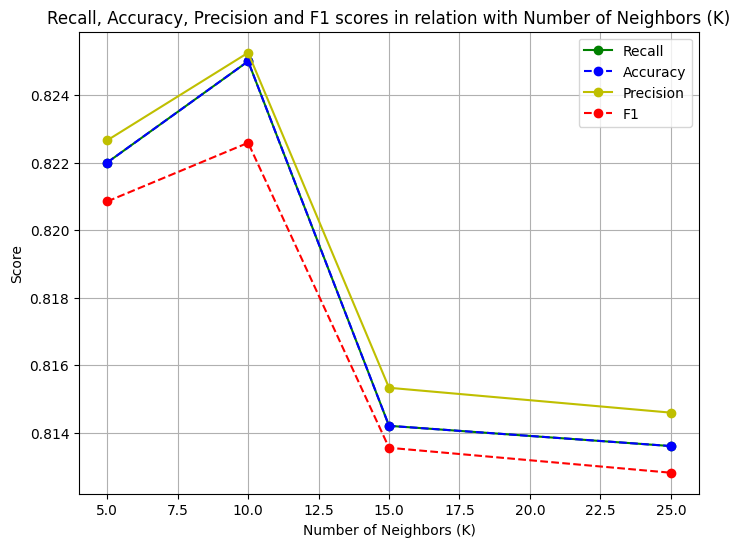

In [11]:
# Plotting Recall and Accuracy on the same plot
plt.figure(figsize=(8, 6))

plt.plot(k_values, recall_values, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(k_values, accuracy_values, marker='o', linestyle='--', color='b', label='Accuracy')
plt.plot(k_values, precision_values, marker='o', linestyle='-', color='y', label='Precision')
plt.plot(k_values, f1_scores, marker='o', linestyle='--', color='r', label='F1')

plt.title('Recall, Accuracy, Precision and F1 scores in relation with Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='best')
plt.show()

As accuracy and recall and are basically almost the same, it can mean these things:
1. Balanced Classes
2. High model performance
3. Few false negatives

The plot show that the best measure what we can use is precision, with $k=10$ neighbours. 

In [15]:
# cross validation with k = 10 fold

# I will need some imput now with the cross val
cv_values = []
cv_means = []

for knn_classifies in knn_fit:
    cv_values.append(cross_val_score(knn_classifies, X_train, y_train, cv=10, scoring='precision_macro'))
for i in range(len(k_values)):
    cv_means.append(cv_values[i].mean())

In [16]:
for i in range(len(k_values)):
    print(f"For {k_values[i]} neighbors the cross validation scores for precision are {cv_values[i]}")
    print(f"With their mean {cv_means[i]}")
    print(60*'-')

For 5 neighbors the cross validation scores for precision are [0.83587    0.83763798 0.83398619 0.8346637  0.83807508 0.8424228
 0.84012354 0.82055803 0.81589855 0.85060641]
With their mean 0.834984227369374
------------------------------------------------------------
For 10 neighbors the cross validation scores for precision are [0.83734473 0.84769912 0.83113773 0.83857043 0.83717513 0.83109772
 0.83946777 0.82377712 0.81618931 0.8606086 ]
With their mean 0.836306766064886
------------------------------------------------------------
For 15 neighbors the cross validation scores for precision are [0.83345676 0.83725966 0.82378099 0.83249606 0.83671742 0.82438962
 0.83451276 0.82655656 0.80926091 0.8528739 ]
With their mean 0.8311304636196943
------------------------------------------------------------
For 25 neighbors the cross validation scores for precision are [0.83155457 0.83294203 0.82283596 0.83342575 0.8253855  0.81428613
 0.83184518 0.82488209 0.80987135 0.85318043]
With their m

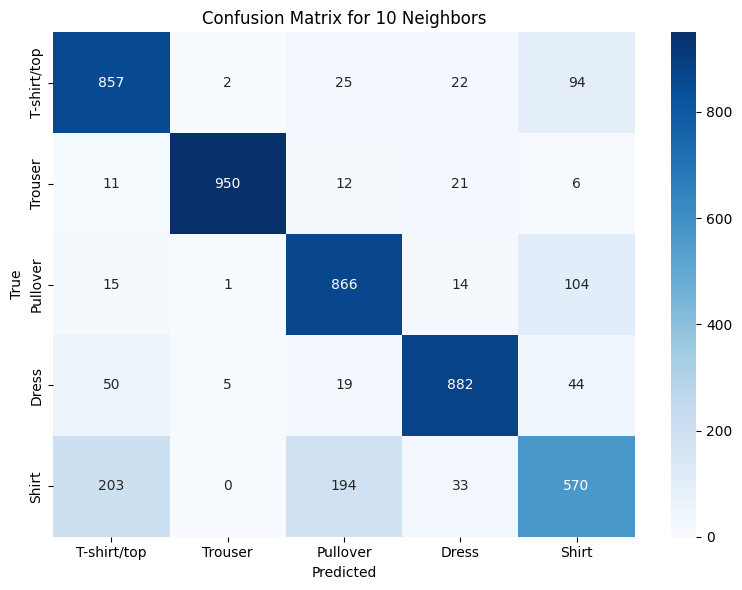

In [13]:
# Confusion matrix for k=10

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(mapping.values()), yticklabels=list(mapping.values()))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred[1], 'Confusion Matrix for 10 Neighbors')
